In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import math

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


linear regression equation for this data

In [33]:
x=df["Ground Temperature"]
y=df["Chirps/Second"]

mean_x = x.mean()
mean_y = y.mean()


def linreg(x,y):
 # Using the formula to calculate b1 and b2
 numer = 0
 denom = 0
 m=len(x)
 for i in range(m):   
   numer += (x[i] - mean_x) * (y[i] - mean_y)   
   denom += (x[i] - mean_x) ** 2


 b1 = numer / denom


 b0 = mean_y - (b1*mean_x)
 print(b1,b0)
 return b1,b0
m,c=linreg(x,y)
print("coef,m: {} \n Intercept,c: {}".format(m,c))

0.20299973140771352 0.4593146452359598
coef,m: 0.20299973140771352 
 Intercept,c: 0.4593146452359598


original data and the equation

Text(0.15, 0.83, 'y = 0.4593 + 0.2030x')

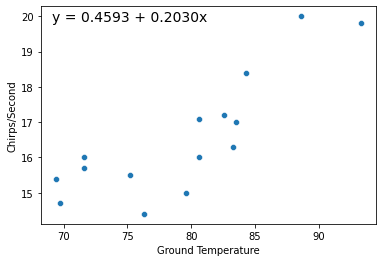

In [36]:
sns.scatterplot(x=df["Ground Temperature"],y=df["Chirps/Second"])
plt.figtext(0.15, 0.83,  f'y = {c:.4f} + {m:.4f}x', size=14)


In [38]:
x=df[["Ground Temperature"]]
y=df["Chirps/Second"]

In [17]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [24]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [0.20299973]
Intercept: 0.45931464523595267


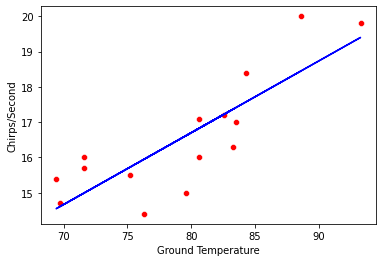

In [30]:
y_pred=model.predict(x)
sns.scatterplot(x=df["Ground Temperature"],y=df["Chirps/Second"],color="red")
plt.plot(x,y_pred,color="blue")
plt.show()

R2  score

In [54]:
model.score(x,y)

0.6922946529146998

Extrapolate data

In [42]:
model.predict([[95]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.74428913])

Interpolate data

In [53]:
temp=(18.0-model.intercept_)/model.coef_
print("Prdeicted Temperature for 18 chrip:",temp)

Prdeicted Temperature for 18 chrip: [86.40743135]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [57]:
data = pd.read_fwf("brain_body.txt")
df =pd.DataFrame(data)
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [58]:
x=df[["Body"]]
y=df["Brain"]

In [59]:
lr=linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression()

In [60]:
lr.coef_

array([0.90291295])

In [61]:
lr.intercept_

-56.85554542859637

In [76]:
lr.score(x,y)

0.8726620843043331

In [70]:
y_pred=0.90291295*x+(-56.85554542859637)
y_pred

,Body
0,-16.675919
1,-42.860395
2,-49.541951
3,325.076632
4,51.042552
...,...
57,95.736743
58,-54.507972
59,-46.562338
60,-54.598263


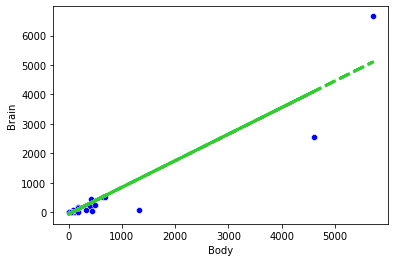

In [75]:
sns.scatterplot(x=df["Body"],y=df["Brain"],color="blue")
plt.plot(x,y_pred,'r--',color="limegreen",label='regression line',lw=3)

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [78]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [87]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

In [88]:
lreg=linear_model.LinearRegression()
lreg.fit(x,y)

LinearRegression()

In [90]:
lreg.coef_

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [91]:
lreg.intercept_

11410.14654725559

In [89]:
print(list(zip(feature, lreg.coef_)))

[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [92]:
lreg.score(x,y)

0.8547180674410969

In [96]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

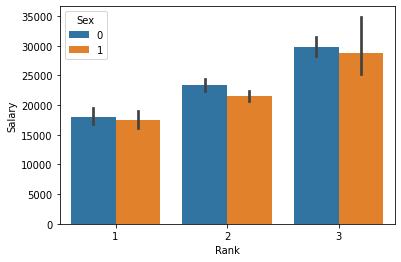

In [113]:
sns.barplot(x=df["Rank"],y=df["Salary"],hue=df["Sex"])

In [122]:
df.groupby("Sex")["Salary"].max()

Sex
0    36350
1    38045
Name: Salary, dtype: int64

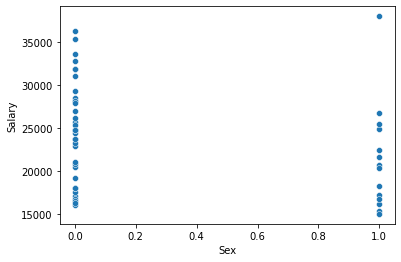

In [117]:
sns.scatterplot(x=df["Sex"],y=df["Salary"])

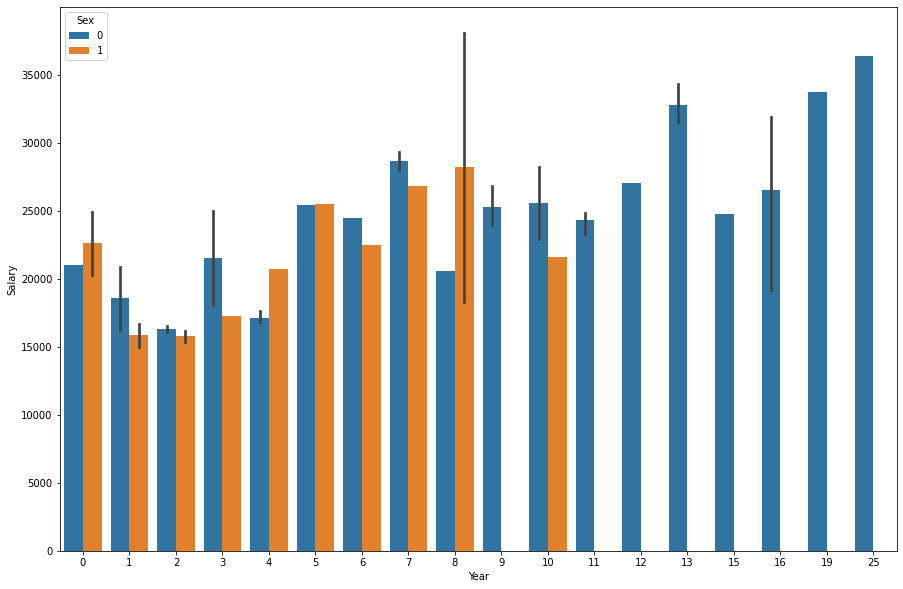

In [129]:
plt.figure(figsize=(15,10))
sns.barplot(x=df["Year"],y=df["Salary"],hue=df["Sex"])

Yes Sex is a factor in Salary but also Number of years in current rank also a factor for Salary determination. 